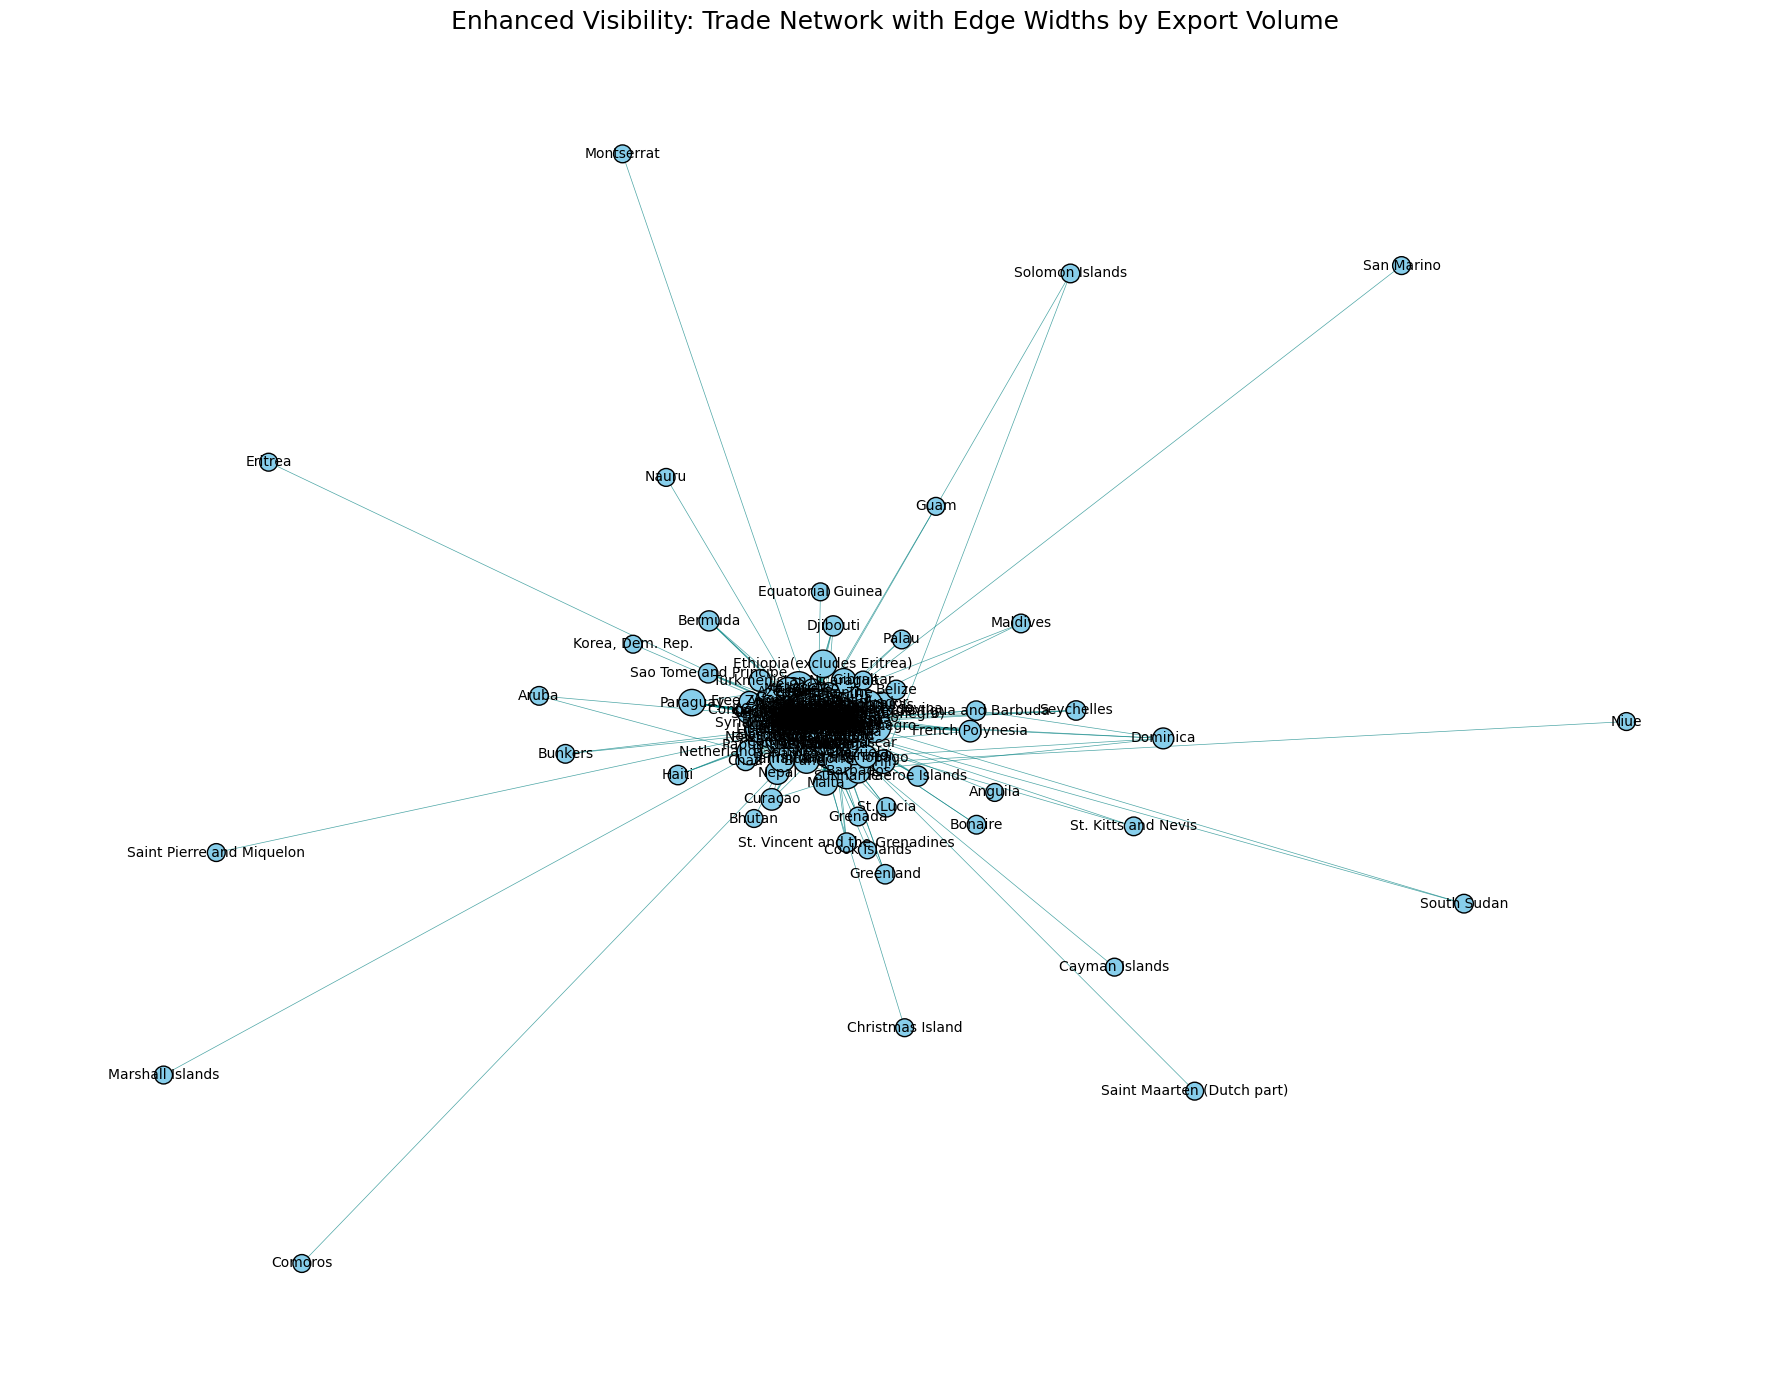

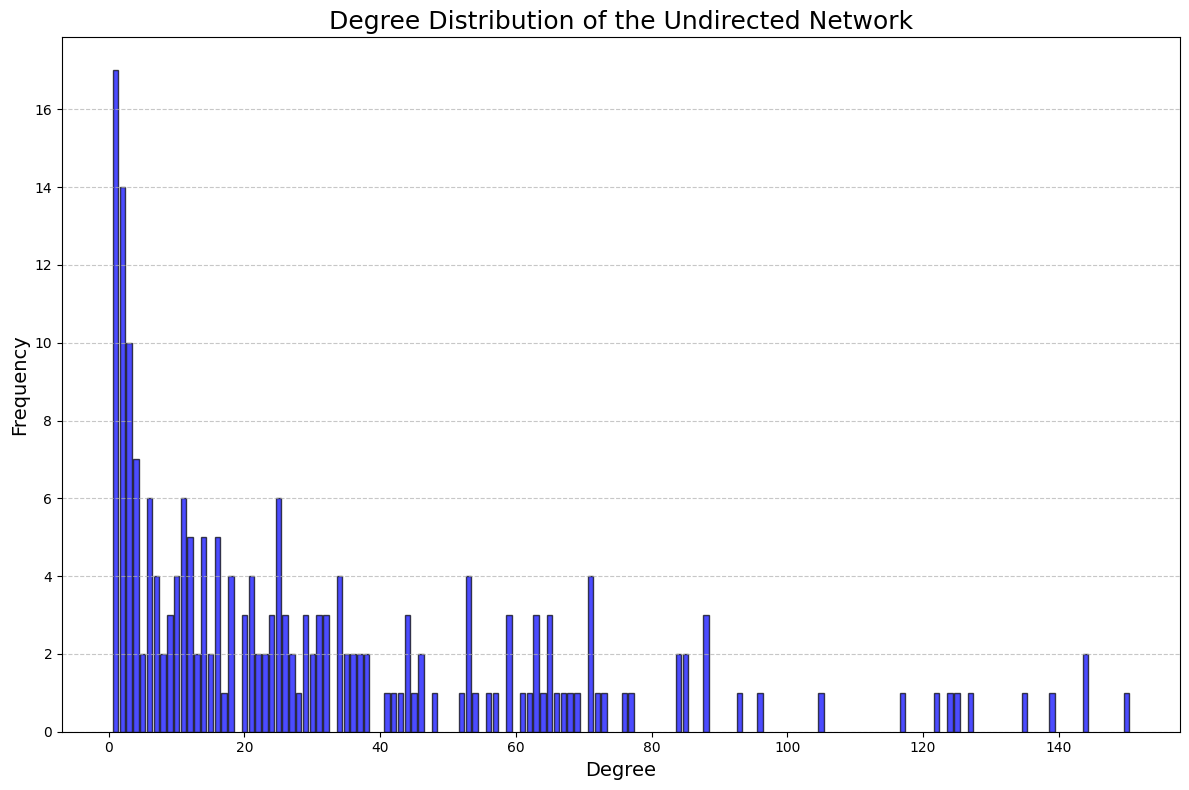

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
file_path = "Data for network creation - Sheet1 (1).csv"
df = pd.read_csv(file_path)

# Create an undirected graph
G = nx.Graph()

# Add edges with export volume as weight
for _, row in df.iterrows():
    source = row['Reporter Name']
    target = row['Partner Name']
    weight = row['Export (US$ Thousand)']
    if weight > 0:
        G.add_edge(source, target, weight=weight)

# Node sizes based on degree
node_sizes = [100 + 10 * (G.degree(n)) for n in G.nodes()]
larger_node_sizes = [s * 1.5 for s in node_sizes]  # Scale up for visibility

# Edge widths based on trade volume
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)
edge_widths_scaled = [0.5 + (w / max_weight * 8) for w in edge_weights]

# Layout for better spacing
pos = nx.spring_layout(G, seed=42, k=0.8)

# Plot the graph
plt.figure(figsize=(18, 14))
nx.draw_networkx_nodes(G, pos, node_size=larger_node_sizes, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=edge_widths_scaled, alpha=0.7, edge_color='teal')
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Enhanced Visibility: Trade Network with Edge Widths by Export Volume", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

# --- Bar Graph for Degree Distribution ---

# Calculate degree frequency
degrees = [G.degree(n) for n in G.nodes()]
degree_counts = Counter(degrees)

# Sort degrees for plotting
sorted_degrees = sorted(degree_counts.items())
x, y = zip(*sorted_degrees)

# Plot the degree distribution as a bar graph
plt.figure(figsize=(12, 8))
plt.bar(x, y, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title("Degree Distribution of the Undirected Network", fontsize=18)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from community import community_louvain  # Python-louvain package


# Load the dataset
file_path = "Data for network creation - Sheet1 (1).csv"
df = pd.read_csv(file_path)


# Create an undirected graph
G = nx.Graph()


# Add edges with weights
for _, row in df.iterrows():
   source = row['Reporter Name']
   target = row['Partner Name']
   weight = row['Export (US$ Thousand)']
   if weight > 0:
       G.add_edge(source, target, weight=weight)


# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]


# Katz Centrality
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000)
top_katz = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10]


# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]


# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]


# HITS (Hubs and Authorities)
hubs, authorities = nx.hits(G, max_iter=1000)
top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10]
top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]


# Print Top Nodes for each Centrality Measure
print("Top Eigenvector Centrality Nodes:", top_eigenvector)
print("Top Katz Centrality Nodes:", top_katz)
print("Top Betweenness Centrality Nodes:", top_betweenness)
print("Top Closeness Centrality Nodes:", top_closeness)
print("Top Hub Scores:", top_hubs)
print("Top Authority Scores:", top_authorities)





Top Eigenvector Centrality Nodes: [('China', 0.16495400045134578), ('Germany', 0.16422094978653087), ('France', 0.16172837386534195), ('Netherlands', 0.15942200692014705), ('United States', 0.1580196665717125), ('United Kingdom', 0.1560630304329399), ('Belgium', 0.15515861406728068), ('Spain', 0.15403462489019382), ('Turkey', 0.1526583850371369), ('Canada', 0.14711720764222228)]
Top Katz Centrality Nodes: [('China', 0.10863013139934785), ('Germany', 0.10694777858948859), ('France', 0.1067543867489295), ('United States', 0.10514787367490418), ('Netherlands', 0.10414402880963386), ('Turkey', 0.10148824828807657), ('Spain', 0.10102078813307243), ('United Kingdom', 0.10090249788044953), ('Belgium', 0.10028847019236449), ('Canada', 0.09834768147683735)]
Top Betweenness Centrality Nodes: [('France', 0.09444595344455266), ('China', 0.09355854329492538), ('United States', 0.09344217672153188), ('Netherlands', 0.06878714458197682), ('Turkey', 0.06552106313491429), ('Germany', 0.0561917109495322

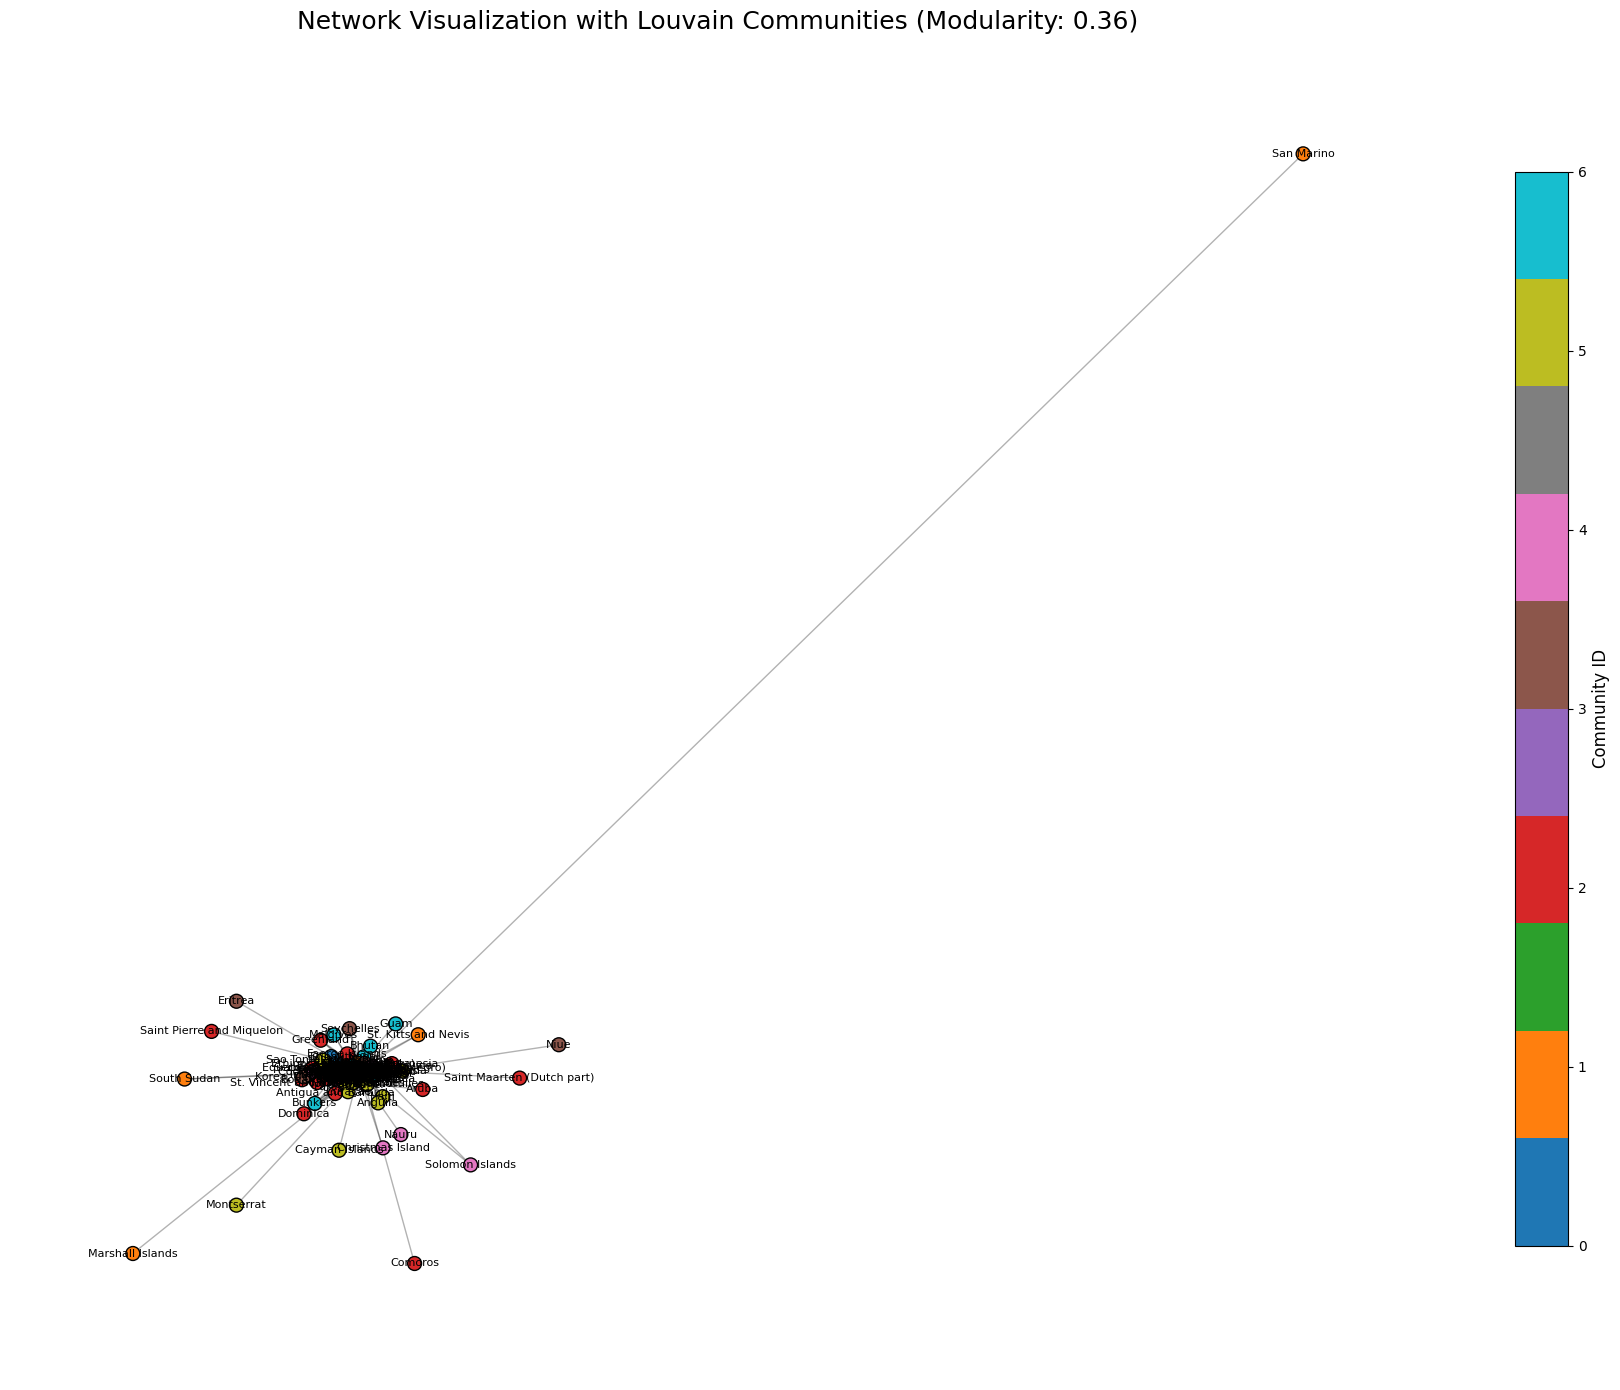

Number of communities detected: 7
Modularity score: 0.36

Community Partition:
Community 1: ['Ethiopia(excludes Eritrea)', 'Djibouti']
Community 2: ['Bulgaria', 'Greece', 'North Macedonia', 'Turkey', 'Armenia', 'Georgia', 'Ghana', 'Suriname', 'Cameroon', 'Cyprus', 'Israel', 'Nigeria', 'Barbados', 'Guyana', 'St. Lucia', "Cote d'Ivoire", 'Dominican Republic', 'Sierra Leone', 'Syrian Arab Republic', 'Burkina Faso', 'Mali', 'Chad', 'Liberia', 'St. Kitts and Nevis', 'Occ.Pal.Terr', 'South Sudan', 'Marshall Islands', 'San Marino']
Community 3: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Germany', 'Spain', 'France', 'Croatia', 'Italy', 'Montenegro', 'Netherlands', 'Poland', 'Serbia, FR(Serbia/Montenegro)', 'Andorra', 'Angola', 'Congo, Rep.', 'United Kingdom', 'Portugal', 'Sao Tome and Principe', 'Denmark', 'Finland', 'Ukraine', 'Switzerland', 'Norway', 'Slovenia', 'Sweden', 'Czech Republic', 'Estonia', 'Hungary', 'Ireland', 'Iceland', 'Lithuania', 'Luxembourg', 'Romania', 'Sl

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from community import community_louvain  # Python-louvain package


# Load the dataset
file_path = "Data for network creation - Sheet1 (1).csv"
df = pd.read_csv(file_path)


# Create an undirected graph
G = nx.Graph()


# Add edges with weights
for _, row in df.iterrows():
   source = row['Reporter Name']
   target = row['Partner Name']
   weight = row['Export (US$ Thousand)']
   if weight > 0:
       G.add_edge(source, target, weight=weight)


# Perform community detection using the Louvain method
partition = community_louvain.best_partition(G, weight='weight')


# Compute modularity score
modularity_score = community_louvain.modularity(partition, G)


# Identify unique communities and assign colors
num_communities = len(set(partition.values()))
color_map = {community: i for i, community in enumerate(set(partition.values()))}
node_colors = [color_map[partition[node]] for node in G.nodes()]


# Define node positions
pos = nx.spring_layout(G, seed=42)


# Plot setup
fig, ax = plt.subplots(figsize=(18, 14))


# Draw nodes with community-based colors
nodes = nx.draw_networkx_nodes(
   G,
   pos,
   node_size=100,
   node_color=node_colors,
   cmap=plt.cm.tab10,
   edgecolors="black",
   ax=ax
)


# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)


# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)


# Colorbar for communities
sm = mpl.cm.ScalarMappable(cmap=plt.cm.tab10, norm=mpl.colors.Normalize(vmin=0, vmax=num_communities - 1))
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label("Community ID", fontsize=12)


# Add title and remove axes
ax.set_title(f"Network Visualization with Louvain Communities (Modularity: {modularity_score:.2f})", fontsize=18)
ax.axis("off")
plt.tight_layout()
plt.show()


# Present the community partition
print(f"Number of communities detected: {num_communities}")
print(f"Modularity score: {modularity_score:.2f}\n")


print("Community Partition:")
for community_id in range(num_communities):
   members = [node for node, comm in partition.items() if comm == community_id]
   print(f"Community {community_id + 1}: {members}")




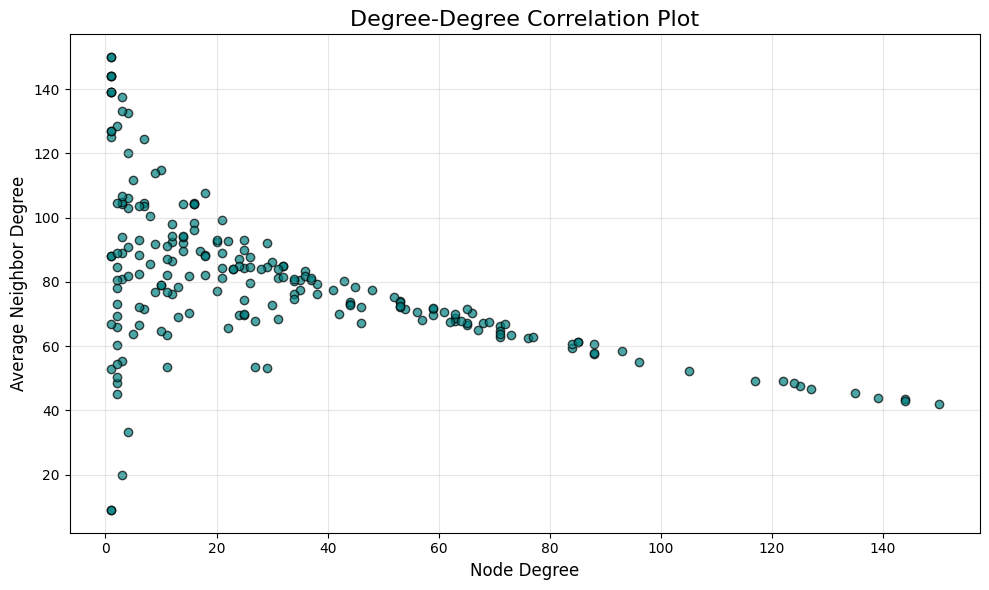

Degree Assortativity (Pearson Correlation Coefficient): -0.34


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Data for network creation - Sheet1 (1).csv"
df = pd.read_csv(file_path)

# Create an undirected graph
G = nx.Graph()

# Add edges with weights
for _, row in df.iterrows():
    source = row['Reporter Name']
    target = row['Partner Name']
    weight = row['Export (US$ Thousand)']
    if weight > 0:
        G.add_edge(source, target, weight=weight)

# Calculate degree assortativity (Pearson correlation coefficient)
degree_assortativity = nx.degree_assortativity_coefficient(G)

# Calculate the average neighbor degree for each node
average_neighbor_degree = nx.average_neighbor_degree(G)
node_degrees = dict(G.degree())

# Prepare data for plotting
x = list(node_degrees.values())
y = [average_neighbor_degree[node] for node in G.nodes()]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color="teal", edgecolors="black")
plt.title("Degree-Degree Correlation Plot", fontsize=16)
plt.xlabel("Node Degree", fontsize=12)
plt.ylabel("Average Neighbor Degree", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Output results
print(f"Degree Assortativity (Pearson Correlation Coefficient): {degree_assortativity:.2f}")


Global Clustering Coefficient (Transitivity): 0.5069
Random Graph Clustering Coefficient: 0.1540

Local Clustering Coefficients for Top 10 Nodes by Degree:
China: 0.2626
Germany: 0.2839
France: 0.2753
United States: 0.2854
Netherlands: 0.3071
Turkey: 0.3246
Spain: 0.3375
United Kingdom: 0.3525
Belgium: 0.3602
Canada: 0.3571


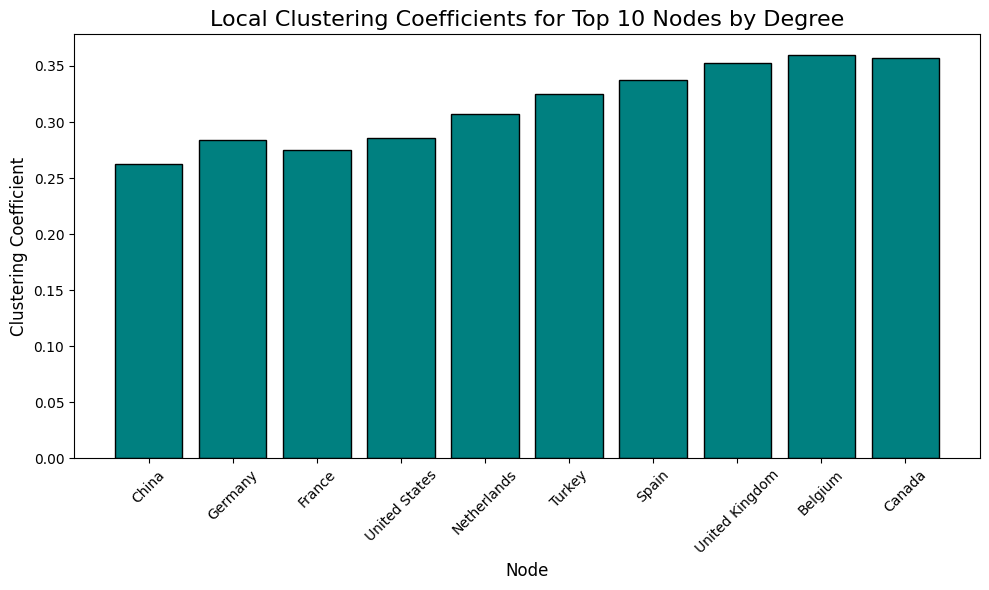

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Load the dataset
file_path = "Data for network creation - Sheet1 (1).csv"
df = pd.read_csv(file_path)


# Create an undirected graph
G = nx.Graph()


# Add edges with weights
for _, row in df.iterrows():
   source = row['Reporter Name']
   target = row['Partner Name']
   weight = row['Export (US$ Thousand)']
   if weight > 0:
       G.add_edge(source, target, weight=weight)


# Compute the global clustering coefficient (transitivity)
global_clustering = nx.transitivity(G)


# Compute local clustering coefficients
local_clustering = nx.clustering(G)


# Identify the top 10 nodes by degree
top_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
top_nodes = [node for node, degree in top_nodes_by_degree]


# Prepare a table of local clustering coefficients for top nodes
local_clustering_subset = {node: local_clustering[node] for node in top_nodes}


# Compare with a random graph of similar size and density
random_graph = nx.erdos_renyi_graph(n=G.number_of_nodes(), p=nx.density(G))
random_clustering = nx.transitivity(random_graph)


# Print results
print(f"Global Clustering Coefficient (Transitivity): {global_clustering:.4f}")
print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}\n")


print("Local Clustering Coefficients for Top 10 Nodes by Degree:")
for node, clustering in local_clustering_subset.items():
   print(f"{node}: {clustering:.4f}")


# Plot local clustering coefficients for top nodes
plt.figure(figsize=(10, 6))
plt.bar(local_clustering_subset.keys(), local_clustering_subset.values(), color='teal', edgecolor='black')
plt.title("Local Clustering Coefficients for Top 10 Nodes by Degree", fontsize=16)
plt.xlabel("Node", fontsize=12)
plt.ylabel("Clustering Coefficient", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()